<a href="https://colab.research.google.com/github/AdrianRuber/03MIAR---Algoritmos-de-Optimizacion/blob/main/Pr%C3%A1ctica_Adri%C3%A1n_Ruber_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:   <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>
Problema:
>2. Organizar los horarios de partidos de La Liga<br>

Descripción del problema:(copiar enunciado)

(*) La respuesta es obligatoria

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.
• Los horarios disponibles se conocen a priori y son los siguientes:

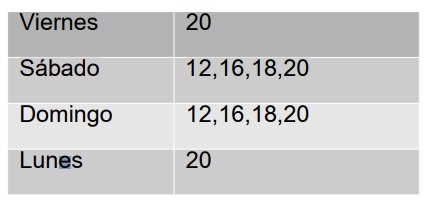

• En primer lugar se clasifican los equipos en tres categorías según el numero de
seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.
• Se conoce estadísticamente la audiencia que genera cada partido según los equipos
que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

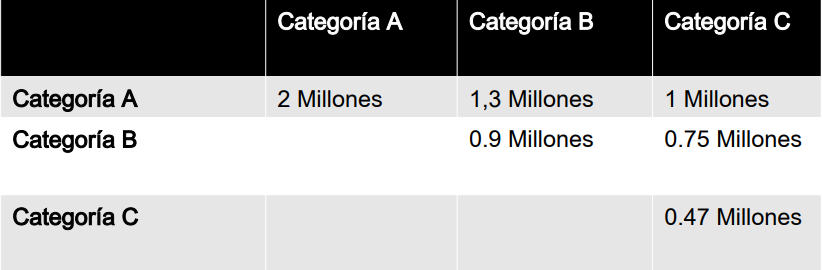

• Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce
según los coeficientes de la siguiente tabla
• Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

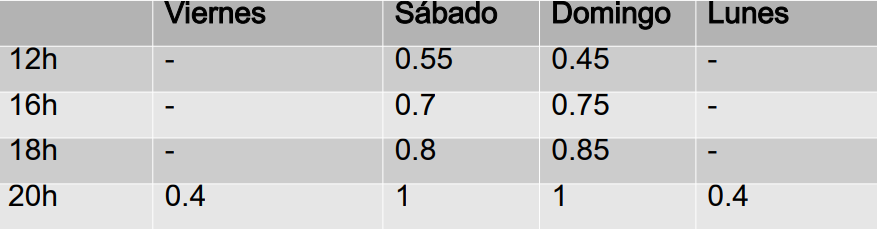

• Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:

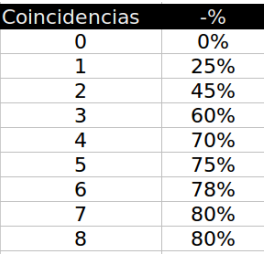







                                        

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Las posibilidades con restricciones y sin restricciones son las mismas, ya que se pueden colocar los partidos de la manera que se quiera, lo único que varía es el resultado.

In [ ]:
posibilidades =  pow(10, 10)
print(posibilidades)

10000000000


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

Al principio pensé en utilizar una estructura de datos del estilo árbol, donde cada partido fuera una rama, sin embargo, esta idea se descartó tras realizar una prueba de ramificación y poda y ver que no funcionaba. Otro motivo fue que como los valores iban a ir cambiando dependiendo de la opción elegida, esta estructura no era la más adecuada.
Por ello cambie a una estructura de lista, donde cada partido tendrá su propia lista con los distintos partidos posibles y sus valores.
Así se puede acceder a cada uno de los elementos de forma sencilla, sin necesidad de recorrer un árbol cada vez.

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

- La función objetivo es objetivo es el tomar el valor máximo de cada partido, maximizando la audiencia.
- Es una función de  maximización, ya que se quiere obtener el valor más alto

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [ ]:
PARTIDOS = [1.3, 1.3, 0.47, 1.3, 0.47, 0.75, 0.9, 0.9, 0.75, 0.9]
TV = [0.4, 0.55, 0.7, 0.8, 1, 0.45, 0.75, 0.85, 1, 0.4]


DATOS = list()
for i in range(len(PARTIDOS)):
  vista = list()
  for j in range(len(TV)):    
    vista.append(round(PARTIDOS[i]*TV[j], 3))
  DATOS.append(vista)
DATOS

[[0.52, 0.715, 0.91, 1.04, 1.3, 0.585, 0.975, 1.105, 1.3, 0.52],
 [0.52, 0.715, 0.91, 1.04, 1.3, 0.585, 0.975, 1.105, 1.3, 0.52],
 [0.188, 0.259, 0.329, 0.376, 0.47, 0.211, 0.352, 0.399, 0.47, 0.188],
 [0.52, 0.715, 0.91, 1.04, 1.3, 0.585, 0.975, 1.105, 1.3, 0.52],
 [0.188, 0.259, 0.329, 0.376, 0.47, 0.211, 0.352, 0.399, 0.47, 0.188],
 [0.3, 0.413, 0.525, 0.6, 0.75, 0.338, 0.562, 0.637, 0.75, 0.3],
 [0.36, 0.495, 0.63, 0.72, 0.9, 0.405, 0.675, 0.765, 0.9, 0.36],
 [0.36, 0.495, 0.63, 0.72, 0.9, 0.405, 0.675, 0.765, 0.9, 0.36],
 [0.3, 0.413, 0.525, 0.6, 0.75, 0.338, 0.562, 0.637, 0.75, 0.3],
 [0.36, 0.495, 0.63, 0.72, 0.9, 0.405, 0.675, 0.765, 0.9, 0.36]]

In [ ]:
def repeticiones_partido(rep, valor):
  nuevo_valor = valor
  if rep == 2:
    nuevo_valor *= 0.75
  elif rep == 3:
    nuevo_valor *= 0.55
  elif rep == 4:
    nuevo_valor *= 0.40
  elif rep == 5:
    nuevo_valor *= 0.30
  elif rep == 6:
    nuevo_valor *= 0.25
  elif rep == 7:
    nuevo_valor *= 0.22
  elif rep == 8:
    nuevo_valor *= 0.20
  elif rep == 9:
    nuevo_valor *= 0.20
  elif rep == 10:
    nuevo_valor *= 0.20
  return nuevo_valor

In [ ]:
def valor(S,DATOS):
  VALOR = 0
  for i in range(len(S)):
    valor_partido  = repeticiones_partido(S.count(S[i]), DATOS[i][S[i]])
    VALOR += valor_partido
  return VALOR

In [ ]:
def fuerza_bruta(DATOS):
  solucion = 0
  mejor_solucion = 0
  for p1 in range(len(DATOS)):
    print("ESTOY EN ", str(p1))
    for p2 in range(len(DATOS)):
      for p3 in range(len(DATOS)):
        for p4 in range(len(DATOS)):
          for p5 in range(len(DATOS)):
            for p6 in range(len(DATOS)):
              for p7 in range(len(DATOS)):
                for p8 in range(len(DATOS)):
                  for p9 in range(len(DATOS)):
                    for p10 in range(len(DATOS)):
                      solucion = valor((p1, p2, p3, p4, p5, p6, p7, p8, p9, p10 ),DATOS)
                      if solucion > mejor_solucion:
                        mejor_solucion = solucion
                        print("MEJOR SOLUCIÓN: ",p1 ,"-", p2,"-", p3,"-", p4,"-", p5,"-", p6,"-", p7,"-", p8,"-", p9,"-", p10,"---", mejor_solucion)
  return mejor_solucion

In [ ]:
#fuerza_bruta(DATOS) #Tarda en ejecutar unas 15 horas, por ello muestro el resultado obtenido con los horarios

El mejor resultado obtenido por fuerza bruta es: 6.857

Los horarios son:

Celta - Real Madrid: Sábado a las 20:00

Valencia - Real Sociedad: Domingo a las 18:00

Mallorca - Eibar: Viernes a las 20:00

Athletic - Barcelona: Domingo a las 20:00

Leganés - Osasuna: Lunes a las 20:00

Villarreal - Granada: Sábado a las 12:00

Alavés - Levante: Sábado a las 16:00

Espanyol - Sevilla: Sábado a las 18:00

Real Betis - Valladolid: Domingo a las 12:00

Atlético de Madrid - Getafe: Domingo a las 16:00

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

Complejidad = O(n^11)

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [ ]:
def repeticiones_partido_voraz(rep, valor):
  nuevo_valor = valor
  if rep == 1:
    nuevo_valor *= 0.75
  elif rep == 2:
    nuevo_valor *= 0.55
  elif rep == 3:
    nuevo_valor *= 0.40
  elif rep == 4:
    nuevo_valor *= 0.30
  elif rep == 5:
    nuevo_valor *= 0.25
  elif rep == 6:
    nuevo_valor *= 0.22
  elif rep == 7:
    nuevo_valor *= 0.20
  elif rep == 8:
    nuevo_valor *= 0.20
  elif rep == 9:
    nuevo_valor *= 0.20

  return nuevo_valor

In [ ]:
def calcular_algoritmo_voraz(fila, S):
  filaDatos = copy.deepcopy(fila)
  S_NOREPEAT = tuple(set(S))
  if len(S) != 0:
    for i in range(len(S_NOREPEAT)):
      filaDatos[S_NOREPEAT[i]] = repeticiones_partido_voraz(S.count(S_NOREPEAT[i]), fila[S_NOREPEAT[i]])
  return filaDatos

In [ ]:
#Algoritmo voraz
import copy
DATOSVORACES = copy.deepcopy(DATOS)
S = ()
for i in range(len(DATOSVORACES)):
  DATOSVORACES[i] = calcular_algoritmo_voraz(DATOSVORACES[i],S)
  max_index = DATOSVORACES[i].index(max(DATOSVORACES[i]))
  S += (max_index,)

print("Horarios ", S)
solucion = valor(S,DATOS)
print("AUDIENCIA ", solucion)


Horarios  (4, 8, 7, 3, 4, 8, 6, 2, 7, 3)
AUDIENCIA  6.267


(*)Calcula la complejidad del algoritmo 

Respuesta

La complejidad es O(n) en calcular_algoritmo_voraz(), y se está llamando n veces a esta función, por lo que la complejidad total será O(n^2)

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Aplica el algoritmo al juego de datos generado

Respuesta

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta